<a href="https://colab.research.google.com/github/Strojove-uceni/2024-final-hlina-rules/blob/main/ProtokolSU2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#     **PrintProtector - Automatizované detekce a klasifikace problémů při 3D tisku v reálném čase**
Lydie Rosenkrancová & Petr Večeř


---




### 1.   **Abstrakt**


3D tisk je jednou z nejrychleji se rozšiřujících technologií současnosti. Díky své flexibilitě, schopnosti rychlé prototypace a nízkým výrobním nákladům nachází uplatnění v široké škále odvětví, včetně zdravotnictví, letectví, robotiky a výroby spotřebního zboží. Přesto je tato technologie stále omezována svou náchylností k chybám během procesu tisku, což zásadně ovlivňuje kvalitu výsledných produktů. Typické chyby, jako je nesprávná teplota tiskového lůžka, špatné nastavení trysky nebo nevhodná rychlost podávání materiálu, mohou vést nejen ke snížené přesnosti rozměrů, ale i k úplnému selhání tisku. Takové chyby způsobují materiálové ztráty, energetické ztráty a prodlužují dobu výroby. Tyto nedostatky se stávají klíčovou překážkou pro širší využití 3D tisku, zejména u bezpečnostně kritických aplikací, jako jsou zdravotnické prostředky nebo komponenty pro letecký průmysl​ [1].
Klasické řešení těchto problémů zahrnuje nepřetržité sledování procesu odborným pracovníkem, což je časově náročné a nevhodné zejména při současném provozu více tiskáren. S rostoucí poptávkou po automatizaci ve výrobě je tedy klíčové vyvinout technologie schopné automatického sledování a detekce chyb v reálném čase. Automatizace tohoto procesu nejenže snižuje potřebu lidského zásahu, ale také výrazně zlepšuje efektivitu, kvalitu a udržitelnost výroby.

Statistiky ukazují, že více než 20 % materiálu používaného při běžném 3D tisku je znehodnoceno kvůli chybám během výroby. Tento problém je ještě závažnější u drahých nebo ekologicky citlivých materiálů, jako jsou bioplastové sloučeniny nebo kompozitní materiály. Automatizované monitorovací systémy mohou přispět k významnému snížení těchto ztrát [1].

V našem projektu jsme se inspirovali článkem zaměřeným na použití multi-head neuronových sítí pro detekci a nápravu chyb v reálném čase. V rámci soutěže jsme si kladli za cíl vytvořit systém schopný klasifikovat čtyři hlavní parametry 3D tisku – teplotu tiskového lůžka, nastavení trysky, rychlost toku materiálu a rychlost podávání – do kategorií nízké, optimální a vysoké. Tento systém by mohl přinést revoluci v automatizaci 3D tisku a umožnit dosažení vyšší kvality tisku s minimálním odpadem.




## 2.  **Naše modely**

V našem projektu jsme navrhli a implementovali tři různé modely, z nichž každý přistupuje k problému detekce a klasifikace chyb při 3D tisku trochu jinak. Hlavním cílem bylo nejen zajistit přesnou detekci chyb, ale také prozkoumat, jak různé architektury ovlivňují schopnost modelu zachytit klíčové vlastnosti obrazu.

1.   **ResNet**

První model, který jsme vytvořili, je upravená verze známé architektury ResNet. Tato architektura je prověřeným základem v oblasti počítačového vidění díky své schopnosti efektivně zachytit složité obrazové vzory. Abychom ji přizpůsobili našim potřebám, přidali jsme čtyři výstupní hlavy – každá z nich odpovídá jednomu parametru tisku (teplota podložky, nastavení trysky, rychlost toku materiálu a rychlost podávání). ResNet jsme zvolili jako srovnávací model, abychom získali představu o výkonnostní základně, kterou můžeme očekávat. Slouží nám tedy jako referenční bod srování s novými
architekturami.




Vizualizace námi upraveného ResNetu:

![](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/c89f3e3f0b7e1893aa8ae6d55a92b0556ed8a15e/CustomResNet.svg)


2.   **Model inspirovaný článkem**

Při implemetaci druhého modelu jsme se snažili co nejvěrněji napodobit architekturu z již zmiňovaného článku. Ačkoli některé detaily článek nespecifikoval, věříme, že případné odchylky v architektuře jsou zanedbatelné. Tento model je strukturou blízký ResNetu, ale využívá tři attention jednotky, z nichž každá má unikátní parametry i strukturu. Tyto jednotky jsou propojeny reziduálními bloky, aby se zabránilo mizení gradientu. Po závěrečném poolingu je výstup předán do čtyř plně propojených lineárních hlav, z nichž každá vrací predikci pro jeden z parametrů tisku.

Díky společnému jádru dokáže model efektivně extrahovat a sdílet informace mezi jednotlivými parametry, což výrazně zlepšuje přesnost predikcí. Tento přístup nám umožnil lépe pochopit silné stránky navržené architektury a ukázal, jak zásadní je schopnost modelu učit se propojení mezi různými parametry tisku.



Vizulace modelu který jsme pracovně nazvali ArticleNet:

![](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/c89f3e3f0b7e1893aa8ae6d55a92b0556ed8a15e/cambridge%20network.drawio.svg)



3.  **RosNet**

Posledním modelem je naše vlastní architektura RosNet. Tato unikátní architektura dále vylpešuje model navžený v článku přidáním nových bloků, která mají za cíl zvýšit schopnost modelu zachytit jemné detaily v datech, ale zároveň udržet schopnost zpracovat globální kontext tisku.


Struktura modelu:

RosNet využívá stejný základ tří attention jednotek, které byly představeny v článku. Mezi tyto jednotky jsme vložili tři shallow UNet-like bloky. Tyto bloky jsou propojeny v kaskádové struktuře, což umožňuje modelu postupně zpracovávat informace na různých úrovních rozlišení a efektivně kombinovat globální a lokální vlastnosti obrazu. Zvolili jsme mělkou verzi UNet-like bloků, aby model zůstal výpočetně nenáročný, ale stále dokázal zachovat prostorové informace potřebné pro detekci detailů. Shallow verze UNet-like bloků nám umožnila najít rovnováhu mezi výkonem a efektivitou. Zbytečně hluboké bloky by model zkomplikovaly a zpomalily, což není ideální pro úlohy, které vyžadují rychlé zpracování. RosNet kombinuje klíčové prvky z osvědčených architektur s našimi vlastními vylepšeními, což jej činí ideálním pro přesnou a efektivní detekci problémů během 3D tisku.

Vizualizace RosNetu:

![](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/RosNet.drawio.svg)

# 3. **Dataset**

Dataset, na kterém byl náš model trénován, je sada snímků pořízených během reálného procesu 3D tisku. Obsahuje více než milion snímků, které byly zachyceny kamerou zaměřenou na trysku během tisku různých geometrických tvarů. Každý snímek je doplněn přesnými údaji o klíčových tiskových parametrech, jako je teplota trysky, rychlost toku materiálu, Z offset a rychlost podávání.

Dataset vznikl na osmi 3D tiskárnách Creality CR-20 Pro, které byly vybaveny kamerami sledujícími průběh tisku. Parametry tisku byly během procesu záměrně upravovány – od ideálních nastavení po podmínky, které vedou k chybám. Tento přístup zajišťuje, že dataset zahrnuje širokou škálu situací, od bezchybných tisků po různé typy odchylek.

Data jsou organizována do 192 složek, přičemž každá reprezentuje jeden vytištěný model.
Pro lepší představu o datech je níže uvedený příklad obrázku z datasetu [2].

V datech lehce převádá třída "optimální", anomálie jsou lehce podreprezentované. Nejedná se ovšem o nijak zásadní nevyváženost, proto se ani nijak negativně neprojevila při trénování.


Zde je ukázka jednoho vzorového obrázku z datasetu.


![](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/96a6959feaf69ca48c5106fb49eeef3b6cd7ac3c/image-45.jpg)


# 4. **Transformace dat**

Každý obrázek z trénovací množiny prošel před vstupem do samotného modelu sérií transformací:

1. Náhodná rotace

Každý obrázek je otočen o náhodný úhel v rozsahu od -10° do 10°. Tato transformace simuluje různé úhly pohledu na trysku, což vede k lepší schopnosti generalizace modelu.

2. Náhodná transformace perspektivy

S pravděpodobností 10 % se aplikuje perspektivní transformace s intenzitou deformace 0.5. Simuluje variace vzniklé mechanickými či optickými odchylkami.

3. Centrovaný ořez

Využívá souřadnice trysky pro výběr centrální oblasti obrázku. Následně kolem tohoto centra provede symetrický ořez tak, aby se velikost obrázku zmenšila na 320x320 pixelů. Díky této transformaci se model může soustředit pouze na důležité oblasti obrázku.

4. Náhodný ořez

Náhodně vybírá podoblast z předchozího obrazu (320x320).
Tato oblast je následně změněna na rozlišení 224x224 pixelů.
Zajišťuje, že model nebude přecitlivělý na přesné umístění trysky.

5. Horizontální zrcadlení a barevné úpravy

S pravděpodobností 50 % se obrázek horizontálně převrátí.
Přidá se barevný šum (změny jasu, kontrastu, sytosti a odstínu) s intenzitou 0.1. Tato transformace zlepšuje robustnost modelu vůči změnám v prostředí.

6. Normalizace kanálů  

Provede výpočet průměru a směrodatné odchylky na trénovacích datech.
Každý kanál obrazu je normalizován podle těchto hodnot.
Zajišťuje, že data mají nulový střed a jednotkovou rozptyl, což stabilizuje trénink.







# 5. **Nastavení experimentů**

**Použitá data**

Experimenty jsme spouštěli na školním výpočetním clusteru Helios. Z důvodu velmi omezené kapacity zdrojů jsme byli nuceni trénovat všechny modely pouze na podmnožině všech dat. Testovali jsme několik strategií a jako nejoptimálnější počet vzorků ve smyslu poměru času který zabere samotné načítání dat a trénink nám vyšel počet obrázků 113 224, které jsme pro každý experiment rozdělili na trénovací, validančí a testovací sadu na zákadě stejného random seedu v poměru 70-20-10. Podmnožina dat byla vybrána tak, aby zahrnovala různé kombinace parametrů (hotend_class, z_offset_class, feed_rate_class, flow_rate_class) a byla reprezentativní pro celé spektrum podmínek. Data s velkými chybami nebo špatným osvětlením byla odfiltrována. Před tréninkem data prošla již zmiňovanou sérií transformací. Testovací a validační obrázky byly pouze oříznuty tak, aby byly centrovány přímo na tiskovou trysku a následně byly znormalizovány.

**Optimalizační strategie**

Každý model byl optimalizován pomocí AdamW s počátečním learning rate 0.001. Scheduler ReduceLROnPlateau byl zvolen, aby se přizpůsobil stagnujícímu učení. Parametry early stopping (patience = 10 epoch) byly stanoveny na základě experimentů.

**Hodnocení a metriky**

 Pro hodnocení výkonů našich modelů byly použity metriky accuracy, F1 score, recall precision.

**Použitý hardware**

Experimenty jsme spouštěli na výpočetním uzlu vybaveném grafickými kartami  NVIDIA A100 PCIe.



# **6. Demo verze modelů**




1. **Demo verze ArticleNetu**

<ipython-input-16-5baec386d01e>:508: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("s_best_articlenet.pth", map_location=device))


Hotend temperature: good
Nozzle offset: high
Feed rate: low
Flow rate: high


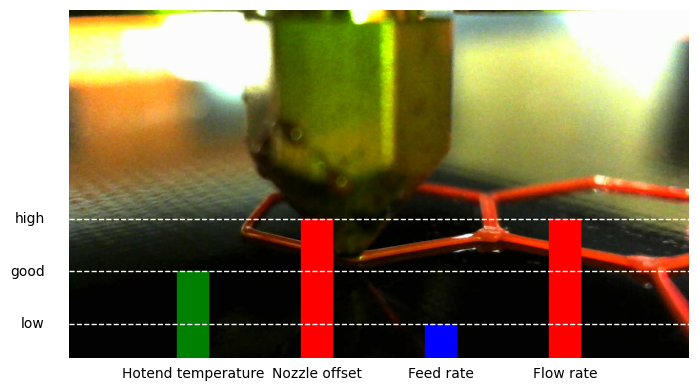

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import UpsamplingBilinear2d
import requests
from io import BytesIO
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
import random
from torch.utils.data import Dataset, DataLoader
from os.path import exists


#po spuštění vytiskne hodnocení stavu čtyř sledovaných veličin


#individual componenents of the final model:
class InitialConvolutionBlock(nn.Module):  #initial convolution
    def __init__(self):
        super(InitialConvolutionBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = F.relu(x)
        x = self.pool(x)
        return x


class PoolingBlock(nn.Module):
    def __init__(self):
        super(PoolingBlock, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        return self.pool(x)

class ResidualBlock(nn.Module):
    def __init__(self, input_channels, output_channels, stride=1):
        super().__init__()
        self.input_channels = input_channels
        self.output_channels = output_channels
        mid_channels = int(self.output_channels/4)
        self.stride = stride

        # First layer
        self.bn1 = nn.BatchNorm2d(input_channels)
        self.conv1 = nn.Conv2d(input_channels, mid_channels, kernel_size=1, stride=1, bias=False)

        # Second layer
        self.bn2 = nn.BatchNorm2d(mid_channels)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=stride, padding=1,
                               bias=False)

        # Third layer
        self.bn3 = nn.BatchNorm2d(mid_channels)
        self.conv3 = nn.Conv2d(output_channels // 4, output_channels, kernel_size=1, stride=1, bias=False)

        # Shortcut connection
        self.conv4 = nn.Conv2d(input_channels, output_channels, kernel_size=1, stride=stride,
                               bias=False) if input_channels != output_channels or stride != 1 else None
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.bn1(x)
        out = self.relu(out)
        out = self.conv1(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)

        out = self.bn3(out)
        out = self.relu(out)
        out = self.conv3(out)

        if self.conv4:
            residual = self.conv4(x)

        out += residual
        return out


#three attention modules that differ slightly in the architecture. Their structure copies the architecure from acrticle we draw inspiration from.
class AttentionModule_stage1(nn.Module):
    #three times Maxpooling
    def __init__(self, in_channels, out_channels, size1, size2=None, size3=None, retrieve_mask=False):
        super(AttentionModule_stage1, self).__init__()

        self.initital_residual = ResidualBlock(in_channels, out_channels)
        self.trunk_branch = nn.Sequential(ResidualBlock(in_channels, out_channels),
                                          ResidualBlock(in_channels, out_channels),)

        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual_down1 = ResidualBlock(in_channels, out_channels)
        self.skip1 = ResidualBlock(in_channels, out_channels)

        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual_down2 = ResidualBlock(in_channels, out_channels)
        self.skip2 = ResidualBlock(in_channels, out_channels)

        if size3:
            self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            self.residual_down3 = ResidualBlock(in_channels, out_channels)
            self.upsample3 = UpsamplingBilinear2d(size=size3)
            self.post_residual3 = ResidualBlock(in_channels, out_channels)

        self.upsample2 = UpsamplingBilinear2d(size=size2)
        self.post_residual2 = ResidualBlock(in_channels, out_channels)

        self.upsample1 = UpsamplingBilinear2d(size=size1)
        self.final_residual = nn.Sequential(
                                            nn.BatchNorm2d(out_channels),
                                            nn.ReLU(inplace=True),
                                            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
                                            nn.BatchNorm2d(out_channels),
                                            nn.ReLU(inplace=True),
                                            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
                                            nn.Sigmoid()
                                            )

        self.last_residual = ResidualBlock(in_channels, out_channels)
        self.retrieve_mask = retrieve_mask

    def forward(self, x):
        x = self.initital_residual(x)

        #trunk branch:
        trunk_output = self.trunk_branch(x)

        #mask branch:
        mask = self.pool1(x)
        mask = self.residual_down1(mask)
        skip1 = self.skip1(mask)

        mask = self.pool2(mask)
        mask = self.residual_down2(mask)
        skip2 = self.skip2(mask)

        if hasattr(self, 'pool3'):
            mask = self.pool3(mask)
            mask = self.residual_down3(mask)
            mask = self.upsample3(mask)
            mask = mask + skip2
            mask = self.post_residual3(mask)

        mask = self.upsample2(mask)
        mask = mask + skip1
        mask = self.post_residual2(mask)

        mask = self.upsample1(mask)
        mask = self.final_residual(mask)

        output = (1+mask)*trunk_output
        output = self.last_residual(output)

        if self.retrieve_mask:
            return output, mask
        return output


class AttentionModule_stage2(nn.Module):
    # two times Maxpooling
    def __init__(self, in_channels, out_channels, size1=(28, 28), size2=(14, 14), retrieve_mask=False):
        super(AttentionModule_stage2, self).__init__()
        self.first_residual_blocks = ResidualBlock(in_channels, out_channels)

        # Trunk branch
        self.trunk_branches = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        # Mask branch
        self.mpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual1_blocks = ResidualBlock(in_channels, out_channels)
        self.skip1_connection_residual_block = ResidualBlock(in_channels, out_channels)

        self.mpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual2_blocks = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        self.interpolation2 = nn.UpsamplingBilinear2d(size=(28, 28))
        self.residual3_blocks = ResidualBlock(in_channels, out_channels)
        self.interpolation1 = nn.UpsamplingBilinear2d(size=(56, 56))

        self.residual4_blocks = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.Sigmoid(),
        )

        self.last_blocks = ResidualBlock(in_channels, out_channels)

        self.retrieve_mask = retrieve_mask

    def forward(self, x): #forward pass
        x = self.first_residual_blocks(x)
        out_trunk = self.trunk_branches(x)

        out_mpool1 = self.mpool1(x)
        out_residual1 = self.residual1_blocks(out_mpool1)
        out_skip1_connection = self.skip1_connection_residual_block(out_residual1)

        out_mpool2 = self.mpool2(out_residual1)
        out_residual2 = self.residual2_blocks(out_mpool2)

        out_interp2 = self.interpolation2(out_residual2) + out_residual1
        out = out_interp2 + out_skip1_connection
        out_residual3 = self.residual3_blocks(out)
        out_interp1 = self.interpolation1(out_residual3) + out_trunk
        out_residual4 = self.residual4_blocks(out_interp1)
        out = (1 + out_residual4) * out_trunk
        out_last = self.last_blocks(out)

        if self.retrieve_mask:
            return out_last, out_residual4
        return out_last


class AttentionModule_stage3(nn.Module):
    # only one Maxpooling
    def __init__(self, in_channels, out_channels, size1=(14, 14), retrieve_mask=False):
        super(AttentionModule_stage3, self).__init__()
        self.first_residual_blocks = ResidualBlock(in_channels, out_channels)

        # Trunk branch
        self.trunk_branches = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        # Mask branch
        self.mpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual1_blocks = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        self.interpolation1 = nn.UpsamplingBilinear2d(size=(56, 56))
        self.residual2_blocks = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.Sigmoid(),
        )

        self.last_blocks = ResidualBlock(in_channels, out_channels)

        self.retrieve_mask = retrieve_mask

    def forward(self, x):
        x = self.first_residual_blocks(x)
        out_trunk = self.trunk_branches(x)

        out_mpool1 = self.mpool1(x)
        out_residual1 = self.residual1_blocks(out_mpool1)

        out_interp1 = self.interpolation1(out_residual1) + out_trunk
        out_residual2 = self.residual2_blocks(out_interp1)
        out = (1 + out_residual2) * out_trunk
        out_last = self.last_blocks(out)

        if self.retrieve_mask:
            return out_last, out_residual2
        return out_last

#image preprocessing (used only for training)
class RandomRotate:
    def __init__(self):
        pass

    def __call__(self, image):
        transform = transforms.RandomRotation(degrees=(-10,10))
        return transform(image)

class RandomPerspectiveTransform:    #applied with the 0.1 probability
    def __init__(self):
        pass

    def __call__(self, image):
        transform = transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
        if random.random() < 0.1:
            return transform(image)
        else:
            return image

class CenteredCrop:
    def __init__(self, crop_size=100, output_size=320):
        self.crop_size = crop_size
        self.output_size = output_size

    def __call__(self, image, nozzle_x, nozzle_y):
        # Ensure nozzle_x and nozzle_y are scalars (already ensured in CustomDataset)
        left = int(nozzle_x - self.crop_size / 2)
        upper = int(nozzle_y - self.crop_size / 2)
        right = int(nozzle_x + self.crop_size / 2)
        lower = int(nozzle_y + self.crop_size / 2)

        cropped_img = image.crop((left, upper, right, lower))
        resized_img = cropped_img.resize((self.output_size, self.output_size), Image.LANCZOS)

        return resized_img

class RandomCrop:
    def __init__(self, output_size=224):
        self.output_size = output_size

    def __call__(self, image):
        h, w = image.size[1], image.size[0]  # the image will be after 320x320 reshaping so they are equal
        scale_factor = random.uniform(0.9, 1.0)
        crop_size = int(h * scale_factor)
        max_top = h - crop_size
        max_left = w - crop_size
        top = random.randint(0, max_top)
        left = random.randint(0, max_left)
        cropped = image.crop((left, top, left + crop_size, top + crop_size))
        resized_cropped = cropped.resize((self.output_size, self.output_size), Image.LANCZOS)
        return resized_cropped

class HorizontalFlipColorJitter:  # apply with probability 0.5
    def __init__(self):
        self.brightness = 0.1
        self.contrast = 0.1
        self.saturation = 0.1
        self.hue = 0.1

    def __call__(self, image):
        flipped = image.transpose(Image.FLIP_LEFT_RIGHT)
        color_jitter = transforms.ColorJitter(
            brightness=self.brightness,
            contrast=self.contrast,
            saturation=self.saturation,
            hue=self.hue
        )
        jittered_image = color_jitter(flipped)

        if random.random() < 0.5:
            return jittered_image
        else:
            return image

class TransformPipeline:
    def __init__(self, transforms):
        self.transforms = transforms  # List of transformations

    def __call__(self, image, nozzle_x=None, nozzle_y=None):
        for transform in self.transforms:
            if isinstance(transform, CenteredCrop):
                if nozzle_x is not None and nozzle_y is not None:
                    image = transform(image, nozzle_x, nozzle_y)
                else:
                    raise ValueError("nozzle_x and nozzle_y must be provided for CenteredCrop")
            else:
                image = transform(image)
        return image


class IterateDataset(Dataset):  #simple Dataset that iterates through images, use for compuatation of mean and std channels
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        if not exists(image_path):
            print(f"Image not found: {image_path}.")
            return self.__getitem__((idx + 1) % len(self))

        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)
        return image


class CalculateMeanStd: #function used for channel normalisation
    def __init__(self, image_paths, batch_size=32):
        self.image_paths = image_paths
        self.dataset = IterateDataset(self.image_paths)
        self.data_loader = DataLoader(self.dataset, batch_size= batch_size, shuffle = False)
        self.mean = torch.zeros(3)
        self.std = torch.zeros(3)
        self.num_samples = 0

    def __call__(self):
        self.mean.zero_()
        self.std.zero_()
        self.num_samples = 0
        for images in self.data_loader:
            num_batch_samples = images.size(0)
            images = images.view(num_batch_samples, 3, -1)
            self.mean += images.mean(2).sum(0)
            self.std += images.std(2).sum(0)
            self.num_samples += num_batch_samples

        mean = self.mean/self.num_samples
        std = self.std/self.num_samples

        return mean, std

class NormalizeChannels:
    def __init__(self, image_paths):
        mean_std_calculator=CalculateMeanStd(image_paths)
        self.mean, self.std = mean_std_calculator()
        self.to_tensor = transforms.ToTensor()
    def __call__(self, image):
        image = self.to_tensor(image)
        normalize = transforms.Normalize(self.mean, self.std)
        normalized = normalize(image)
        return normalized


class CustomDataset(Dataset): #loader to load images as well as nozzle coordinates from csv as they are necessary for centered crop in the transform pipelina
    def __init__(self, image_paths, labels, nozzle_coords, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.nozzle_coords = nozzle_coords
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        if not exists(image_path):
            print(f"path does not exist {image_path}")
            next_idx = (idx + 1) % len(self)
            return self.__getitem__(next_idx)
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        nozzle_x, nozzle_y = self.nozzle_coords[idx]

        if self.transform:
            if isinstance(self.transform, TransformPipeline):
                image = self.transform(image, nozzle_x=nozzle_x, nozzle_y=nozzle_y)
            else:
                image = self.transform(image)

        return image, label



class ResidualAttentionNetwork(nn.Module): #the model
    def __init__(self):
        super(ResidualAttentionNetwork, self).__init__()

        self.initial_conv = InitialConvolutionBlock()
        self.pool = PoolingBlock() #paramters were not specified in the article, they are our choice
        self.residual0 = ResidualBlock(input_channels=64, output_channels=256)
        self.attention1 = AttentionModule_stage1(in_channels=256, out_channels=256, size1=(56, 56), size2=(28, 28),
                                                 size3=(14, 14))
        self.residual1 = ResidualBlock(input_channels=256, output_channels=256)
        self.attention2 = AttentionModule_stage2(in_channels=256, out_channels=256, size1=(28, 28), size2=(14, 14))
        self.residual2 = ResidualBlock(input_channels=256, output_channels=256)
        self.attention3 = AttentionModule_stage3(in_channels=256, out_channels=256, size1=(14, 14))
        self.residual3 = ResidualBlock(input_channels=256, output_channels=256)
        self.residual4 = ResidualBlock(input_channels=256, output_channels=256)
        self.residual5 = ResidualBlock(input_channels=256, output_channels=256)
        self.final_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(256, 3)
        self.fc2 = nn.Linear(256, 3)
        self.fc3 = nn.Linear(256, 3)
        self.fc4 = nn.Linear(256, 3)

    def forward(self,x):
        x = self.initial_conv(x)
        x = self.pool(x)
        x = self.residual0(x)
        x = self.attention1(x)
        x = self.residual1(x)
        x = self.attention2(x)
        x = self.residual2(x)
        x = self.attention3(x)
        x = self.residual3(x)
        x = self.residual4(x)
        x = self.residual5(x)
        x = self.final_pool(x)
        x = torch.flatten(x, 1)
        out1 = self.fc1(x)
        out2 = self.fc2(x)
        out3 = self.fc3(x)
        out4 = self.fc4(x)
        return out1, out2, out3, out4

#loads pretrained model from git
model_url = "https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/s_best_articlenet.pth"
response = requests.get(model_url)
with open("s_best_articlenet.pth", "wb") as f:
    f.write(response.content)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResidualAttentionNetwork()
model.load_state_dict(torch.load("s_best_articlenet.pth", map_location=device))
model.to(device)
model.eval()

# Downloads and prepress the image
image_url = "https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/image-45.jpg"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
input_tensor = transform(img).unsqueeze(0).to(device)

classes = ["low", "good", "high"]


with torch.no_grad():
    out1, out2, out3, out4 = model(input_tensor)


def interpret_output(output):
    predictions = torch.argmax(output, dim=1).cpu().numpy()
    return [classes[pred] for pred in predictions]

#converts outputs to verbal cathegories
result1 = interpret_output(out1)
result2 = interpret_output(out2)
result3 = interpret_output(out3)
result4 = interpret_output(out4)

# Print the interpreted results
print("Hotend temperature:", result1[0])
print("Nozzle offset:", result2[0])
print("Feed rate:", result3[0])
print("Flow rate:", result4[0])



#function to visualise the predictions
def visualize_predictions(image, predictions):
    color_map = {"low": "blue", "good": "green", "high": "red"}
    height_map = {"low": 0.2, "good": 0.5, "high": 0.8}
    bar_width = 0.05

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.axis("off")

    img_width, img_height = image.size

    bar_bottom = img_height + 40
    bar_heights_px = [int(img_height * h / 2) for h in [0.2, 0.5, 0.8]]
    y_axis_x_offset = -50

    for height_px, label in zip(bar_heights_px, ["low", "good", "high"]):
        ax.axhline(y=img_height - height_px, color="white", linestyle="--", linewidth=1)
        ax.text(y_axis_x_offset, img_height - height_px, label, color="black",
                verticalalignment="center", horizontalalignment="right", fontsize=10)

    num_bars = len(predictions)
    bar_start_x = np.linspace(img_width * 0.2, img_width * 0.8, num_bars)

    for i, (prediction, bar_x) in enumerate(zip(predictions, bar_start_x)):
        bar_height_px = bar_heights_px[["low", "good", "high"].index(prediction)]
        bar_color = color_map[prediction]
        ax.add_patch(
            plt.Rectangle(
                (bar_x - bar_width * img_width / 2, img_height - bar_height_px),
                bar_width * img_width,
                bar_height_px,
                color=bar_color,
            )
        )
        ax.text(bar_x, bar_bottom, ["Hotend temperature", "Nozzle offset", "Feed rate", "Flow rate"][i],
                color="black", ha="center", fontsize=10)

    plt.show()

predicted_categories = [result1[0], result2[0], result3[0], result4[0]]
visualize_predictions(img, predicted_categories)

**Vytrénovaný ResNet je příliš velký na to, aby byl nahraný na Github.**
Proto je tato demo verze model před tréninkem.

Hotend temperature: good
Nozzle offset: high
Feed rate: low
Flow rate: high


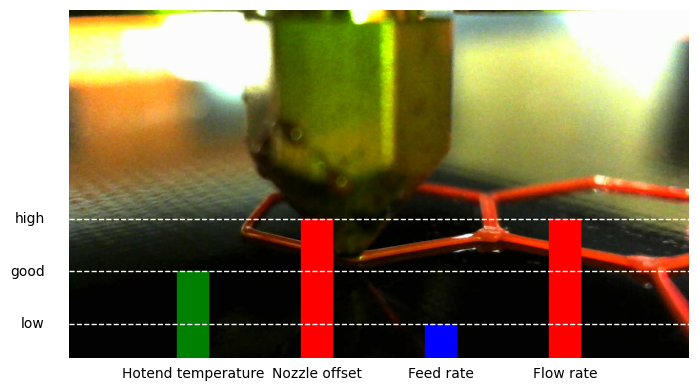

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

resnet = models.resnet50(pretrained=True) #load pretrained resnet

class CustomResNet(nn.Module):
    def __init__(self, base_model):
        super(CustomResNet, self).__init__()
        self.base_model = base_model
        self.base_model.fc = nn.Identity()  # Remove the original fully connected layer

        self.fc1 = nn.Linear(2048, 3)
        self.fc2 = nn.Linear(2048, 3)
        self.fc3 = nn.Linear(2048, 3)
        self.fc4 = nn.Linear(2048, 3)

    def forward(self, x):
        print("beginning forward pass")
        x = self.base_model(x)
        out1 = self.fc1(x)
        out2 = self.fc2(x)
        out3 = self.fc3(x)
        out4 = self.fc4(x)
        print("forward pass finished")
        return out1, out2, out3, out4


image_url = "https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/image-45.jpg" #download image for demonstration
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
input_tensor = transform(img).unsqueeze(0).to(device)

classes = ["low", "good", "high"]

with torch.no_grad():
    out1, out2, out3, out4 = model(input_tensor)

#converts the numerical output to verbal cathegories
def interpret_output(output):
    predictions = torch.argmax(output, dim=1).cpu().numpy()
    return [classes[pred] for pred in predictions]


result1 = interpret_output(out1)
result2 = interpret_output(out2)
result3 = interpret_output(out3)
result4 = interpret_output(out4)

print("Hotend temperature:", result1[0])
print("Nozzle offset:", result2[0])
print("Feed rate:", result3[0])
print("Flow rate:", result4[0])


def visualize_predictions(image, predictions):
    color_map = {"low": "blue", "good": "green", "high": "red"}
    height_map = {"low": 0.2, "good": 0.5, "high": 0.8}
    bar_width = 0.05

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.axis("off")

    img_width, img_height = image.size

    bar_bottom = img_height + 40
    bar_heights_px = [int(img_height * h / 2) for h in [0.2, 0.5, 0.8]]
    y_axis_x_offset = -50

    for height_px, label in zip(bar_heights_px, ["low", "good", "high"]):
        ax.axhline(y=img_height - height_px, color="white", linestyle="--", linewidth=1)
        ax.text(y_axis_x_offset, img_height - height_px, label, color="black",
                verticalalignment="center", horizontalalignment="right", fontsize=10)

    num_bars = len(predictions)
    bar_start_x = np.linspace(img_width * 0.2, img_width * 0.8, num_bars)

    for i, (prediction, bar_x) in enumerate(zip(predictions, bar_start_x)):
        bar_height_px = bar_heights_px[["low", "good", "high"].index(prediction)]
        bar_color = color_map[prediction]
        ax.add_patch(
            plt.Rectangle(
                (bar_x - bar_width * img_width / 2, img_height - bar_height_px),
                bar_width * img_width,
                bar_height_px,
                color=bar_color,
            )
        )
        ax.text(bar_x, bar_bottom, ["Hotend temperature", "Nozzle offset", "Feed rate", "Flow rate"][i],
                color="black", ha="center", fontsize=10)

    plt.show()

predicted_categories = [result1[0], result2[0], result3[0], result4[0]]
visualize_predictions(img, predicted_categories)



3. **Demo verze RosNet**

Tento model je také příliš velký na to, aby se jeho state dictionary vešel na GitHub repozitář. Proto je demostrace níže pouze nevytrénovaný model.

Hotend temperature: good
Nozzle offset: high
Feed rate: low
Flow rate: high


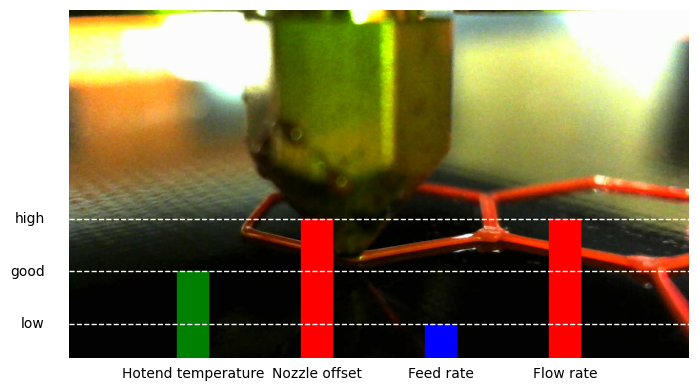

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torchvision.transforms as transforms
import random
from torch.utils.data import Dataset, DataLoader
from os.path import exists
from torch import nn
import torch
from torch.nn import UpsamplingBilinear2d

#this model was inspired by both the ArticleNet and UNet. The aim was to combine these two architectures into one powerful model
#the attention modules are left exactly the same as in articlenet however now they are connected via shallow unet architecture

#image transformations (training only)
class RandomRotate:
    def __init__(self):
        pass

    def __call__(self, image):
        transform = transforms.RandomRotation(degrees=(-10,10))
        return transform(image)

class RandomPerspectiveTransform:    #applied with the 0.1 probability
    def __init__(self):
        pass

    def __call__(self, image):
        transform = transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
        if random.random() < 0.1:
            return transform(image)
        else:
            return image

class CenteredCrop:
    def __init__(self, crop_size=100, output_size=320):
        self.crop_size = crop_size
        self.output_size = output_size

    def __call__(self, image, nozzle_x, nozzle_y):
        # Ensure nozzle_x and nozzle_y are scalars (already ensured in CustomDataset)
        left = int(nozzle_x - self.crop_size / 2)
        upper = int(nozzle_y - self.crop_size / 2)
        right = int(nozzle_x + self.crop_size / 2)
        lower = int(nozzle_y + self.crop_size / 2)

        cropped_img = image.crop((left, upper, right, lower))
        resized_img = cropped_img.resize((self.output_size, self.output_size), Image.LANCZOS)

        return resized_img

class RandomCrop:
    def __init__(self, output_size=224):
        self.output_size = output_size

    def __call__(self, image):
        h, w = image.size[1], image.size[0]  # the image will be after 320x320 reshaping so they are equal
        scale_factor = random.uniform(0.9, 1.0)
        crop_size = int(h * scale_factor)
        max_top = h - crop_size
        max_left = w - crop_size
        top = random.randint(0, max_top)
        left = random.randint(0, max_left)
        cropped = image.crop((left, top, left + crop_size, top + crop_size))
        resized_cropped = cropped.resize((self.output_size, self.output_size), Image.LANCZOS)
        return resized_cropped

class HorizontalFlipColorJitter:  # apply with probability 0.5
    def __init__(self):
        self.brightness = 0.1
        self.contrast = 0.1
        self.saturation = 0.1
        self.hue = 0.1

    def __call__(self, image):
        flipped = image.transpose(Image.FLIP_LEFT_RIGHT)
        color_jitter = transforms.ColorJitter(
            brightness=self.brightness,
            contrast=self.contrast,
            saturation=self.saturation,
            hue=self.hue
        )
        jittered_image = color_jitter(flipped)

        if random.random() < 0.5:
            return jittered_image
        else:
            return image

class TransformPipeline:
    def __init__(self, transforms):
        self.transforms = transforms  # List of transformations

    def __call__(self, image, nozzle_x=None, nozzle_y=None):
        print("Starting image transformations")
        for transform in self.transforms:
            if isinstance(transform, CenteredCrop):
                if nozzle_x is not None and nozzle_y is not None:
                    image = transform(image, nozzle_x, nozzle_y)
                else:
                    raise ValueError("nozzle_x and nozzle_y must be provided for CenteredCrop")
            else:
                image = transform(image)
        print("Image transformations finished")
        return image


class IterateDataset(Dataset):  #simple Dataset that iterates through images, use for compuatation of mean and std channels
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.transform = transforms.ToTensor()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        if not exists(image_path):
            next_idx = (idx + 1) % len(self)
            return self.__getitem__(next_idx)
        image = Image.open(image_path).convert("RGB")
        image = self.transform(image)
        return image


class CalculateMeanStd:
    def __init__(self, image_paths, batch_size=32):
        self.image_paths = image_paths
        self.dataset = IterateDataset(self.image_paths)
        self.data_loader = DataLoader(self.dataset, batch_size= batch_size, shuffle = False)
        self.mean = torch.zeros(3)
        self.std = torch.zeros(3)
        self.num_samples = 0

    def __call__(self):
        self.mean.zero_()
        self.std.zero_()
        self.num_samples = 0
        for images in self.data_loader:
            num_batch_samples = images.size(0)
            images = images.view(num_batch_samples, 3, -1)
            self.mean += images.mean(2).sum(0)
            self.std += images.std(2).sum(0)
            self.num_samples += num_batch_samples

        mean = self.mean/self.num_samples
        std = self.std/self.num_samples

        return mean, std

class NormalizeChannels:
    def __init__(self, image_paths):
        mean_std_calculator=CalculateMeanStd(image_paths)
        self.mean, self.std = mean_std_calculator()
        self.to_tensor = transforms.ToTensor()
    def __call__(self, image):
        image = self.to_tensor(image)
        normalize = transforms.Normalize(self.mean, self.std)
        normalized = normalize(image)
        return normalized


class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, nozzle_coords, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.nozzle_coords = nozzle_coords
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        if not exists(image_path):
            print(f"path does not exist {image_path}")
            next_idx = (idx + 1) % len(self)
            return self.__getitem__(next_idx)
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]
        nozzle_x, nozzle_y = self.nozzle_coords[idx]

        if self.transform:
            if isinstance(self.transform, TransformPipeline):
                image = self.transform(image, nozzle_x=nozzle_x, nozzle_y=nozzle_y)
            else:
                image = self.transform(image)

        return image, label


class DoubleConv(nn.Module):  #initial double convolution as in unet
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1, bias = False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias = False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.conv(x)

class PoolingBlock(nn.Module):
    def __init__(self):
        super(PoolingBlock, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        return self.pool(x)

class DownSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DownSample, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.double_conv = DoubleConv(self.in_channels, self.out_channels)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.double_conv(x)
        pooled = self.pool(x)

        return x, pooled

class UpSample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpSample, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        x = torch.cat([x1, x2], dim=1)
        x = self.conv(x)
        return x


class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.in_channels = in_channels
        self.output_channels = out_channels
        mid_channels = int(self.output_channels/4)
        self.stride = stride

        #First layer:
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, mid_channels, kernel_size=1, stride=1, padding=0, bias = False)

        #Second layer
        self.bn2 = nn.BatchNorm2d(mid_channels)
        self.conv2 = nn.Conv2d(mid_channels, mid_channels, kernel_size=3, stride=stride, padding=1, bias = False)

        #Third layer
        self.bn3 = nn.BatchNorm2d(mid_channels)
        self.conv3 = nn.Conv2d(out_channels // 4, out_channels, kernel_size=1, stride=1,padding=0, bias=False)

        self.conv4 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride,
                               bias=False) if in_channels != out_channels or stride != 1 else None
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        residual = x
        out = self.bn1(x)
        out = self.relu(out)
        out = self.conv1(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)

        out = self.bn3(out)
        out = self.relu(out)
        out = self.conv3(out)

        if self.conv4:
            residual = self.conv4(out)

        out += residual
        return out

class AttentionModule_stage1(nn.Module):
    #three times Maxpooling
    def __init__(self, in_channels, out_channels, size1, size2, size3, retrieve_mask=False):
        super(AttentionModule_stage1, self).__init__()

        self.initital_residual = ResidualBlock(in_channels, out_channels)
        self.trunk_branch = nn.Sequential(ResidualBlock(in_channels, out_channels),
                                          ResidualBlock(in_channels, out_channels),)

        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual_down1 = ResidualBlock(in_channels, out_channels)
        self.skip1 = ResidualBlock(in_channels, out_channels)

        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual_down2 = ResidualBlock(in_channels, out_channels)
        self.skip2 = ResidualBlock(in_channels, out_channels)

        if size3:
            self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            self.residual_down3 = ResidualBlock(in_channels, out_channels)
            self.upsample3 = UpsamplingBilinear2d(size=size3)
            self.post_residual3 = ResidualBlock(in_channels, out_channels)

        self.upsample2 = UpsamplingBilinear2d(size=size2)
        self.post_residual2 = ResidualBlock(in_channels, out_channels)

        self.upsample1 = UpsamplingBilinear2d(size=size1)
        self.final_residual = nn.Sequential(
                                            nn.BatchNorm2d(out_channels),
                                            nn.ReLU(inplace=True),
                                            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
                                            nn.BatchNorm2d(out_channels),
                                            nn.ReLU(inplace=True),
                                            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
                                            nn.Sigmoid()
                                            )

        self.last_residual = ResidualBlock(in_channels, out_channels)
        self.retrieve_mask = retrieve_mask

    def forward(self, x):
        x = self.initital_residual(x)

        # Trunk branch:
        trunk_output = self.trunk_branch(x)

        # Mask branch:
        mask = self.pool1(x)
        mask = self.residual_down1(mask)
        skip1 = self.skip1(mask)

        mask = self.pool2(mask)
        mask = self.residual_down2(mask)
        skip2 = self.skip2(mask)

        if hasattr(self, 'pool3'):
            mask = self.pool3(mask)
            mask = self.residual_down3(mask)
            mask = self.upsample3(mask)
            # Align mask with skip2 dimensions
            if mask.size() != skip2.size():
                mask = torch.nn.functional.interpolate(mask, size=skip2.shape[2:], mode='bilinear', align_corners=False)
            mask = mask + skip2
            mask = self.post_residual3(mask)

        mask = self.upsample2(mask)
        # Align mask with skip1 dimensions
        if mask.size() != skip1.size():
            mask = torch.nn.functional.interpolate(mask, size=skip1.shape[2:], mode='bilinear', align_corners=False)
        mask = mask + skip1
        mask = self.post_residual2(mask)

        mask = self.upsample1(mask)
        # Align mask with trunk_output dimensions
        if mask.size() != trunk_output.size():
            mask = torch.nn.functional.interpolate(mask, size=trunk_output.shape[2:], mode='bilinear',
                                                   align_corners=False)
        mask = self.final_residual(mask)

        output = (1 + mask) * trunk_output
        output = self.last_residual(output)

        if self.retrieve_mask:
            return output, mask
        return output


class AttentionModule_stage2(nn.Module):
    # two times Maxpooling
    def __init__(self, in_channels, out_channels, retrieve_mask=False):
        super(AttentionModule_stage2, self).__init__()
        self.first_residual_blocks = ResidualBlock(in_channels, out_channels)

        # Trunk branch
        self.trunk_branches = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        # Mask branch
        self.mpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual1_blocks = ResidualBlock(in_channels, out_channels)
        self.skip1_connection_residual_block = ResidualBlock(in_channels, out_channels)

        self.mpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual2_blocks = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        self.interpolation2 = nn.UpsamplingBilinear2d(size=(28, 28))
        self.residual3_blocks = ResidualBlock(in_channels, out_channels)
        self.interpolation1 = nn.UpsamplingBilinear2d(size=(56, 56))

        self.residual4_blocks = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.Sigmoid(),
        )

        self.last_blocks = ResidualBlock(in_channels, out_channels)

        self.retrieve_mask = retrieve_mask

    def forward(self, x):
        x = self.first_residual_blocks(x)
        out_trunk = self.trunk_branches(x)

        out_mpool1 = self.mpool1(x)
        out_residual1 = self.residual1_blocks(out_mpool1)
        out_skip1_connection = self.skip1_connection_residual_block(out_residual1)

        out_mpool2 = self.mpool2(out_residual1)
        out_residual2 = self.residual2_blocks(out_mpool2)

        out_interp2 = self.interpolation2(out_residual2)

        if out_interp2.size() != out_residual1.size():
            out_interp2 = torch.nn.functional.interpolate(out_interp2, size=out_residual1.shape[2:], mode='bilinear',
                                                          align_corners=False)

        out = out_interp2 + out_residual1


        if out.size() != out_skip1_connection.size():
            out = torch.nn.functional.interpolate(out, size=out_skip1_connection.shape[2:], mode='bilinear',
                                                  align_corners=False)
        out += out_skip1_connection

        out_residual3 = self.residual3_blocks(out)
        out_interp1 = self.interpolation1(out_residual3)


        if out_interp1.size() != out_trunk.size():
            out_interp1 = torch.nn.functional.interpolate(out_interp1, size=out_trunk.shape[2:], mode='bilinear',
                                                          align_corners=False)

        out_residual4 = self.residual4_blocks(out_interp1)
        out = (1 + out_residual4) * out_trunk
        out_last = self.last_blocks(out)

        if self.retrieve_mask:
            return out_last, out_residual4
        return out_last


class AttentionModule_stage3(nn.Module):
    # only one Maxpooling
    def __init__(self, in_channels, out_channels, retrieve_mask=False):
        super(AttentionModule_stage3, self).__init__()
        self.first_residual_blocks = ResidualBlock(in_channels, out_channels)

        # Trunk branch
        self.trunk_branches = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        # Mask branch
        self.mpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.residual1_blocks = nn.Sequential(
            ResidualBlock(in_channels, out_channels),
            ResidualBlock(in_channels, out_channels),
        )

        self.interpolation1 = nn.UpsamplingBilinear2d(size=(56, 56))
        self.residual2_blocks = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=1, bias=False),
            nn.Sigmoid(),
        )

        self.last_blocks = ResidualBlock(in_channels, out_channels)

        self.retrieve_mask = retrieve_mask

    def forward(self, x):
        x = self.first_residual_blocks(x)
        out_trunk = self.trunk_branches(x)

        out_mpool1 = self.mpool1(x)
        out_residual1 = self.residual1_blocks(out_mpool1)

        # Adjust dimensions of out_residual1 to match out_trunk
        out_interp1 = self.interpolation1(out_residual1)
        if out_interp1.size() != out_trunk.size():
            out_interp1 = torch.nn.functional.interpolate(out_interp1, size=out_trunk.shape[2:], mode='bilinear',
                                                          align_corners=False)

        out_interp1 = out_interp1 + out_trunk
        out_residual2 = self.residual2_blocks(out_interp1)
        out = (1 + out_residual2) * out_trunk
        out_last = self.last_blocks(out)

        if self.retrieve_mask:
            return out_last, out_residual2
        return out_last


#the model
class RosNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(RosNet, self).__init__()
        self.double_conv = DoubleConv(in_channels, out_channels)
        self.pooling = PoolingBlock()

        #First block
        self.down1 = DownSample(in_channels = 64, out_channels=128)
        self.bottleneck1 = DoubleConv(128, 256)
        self.attention1 = AttentionModule_stage1(256, 256, size1=(56, 56), size2=(28, 28), size3=(14, 14))
        self.up1 = UpSample(256, 128)

        # Second block
        self.down2 = DownSample(128, 256)
        self.bottleneck2 = DoubleConv(256, 512)
        self.attention2 = AttentionModule_stage2(512, 512)
        self.up2 = UpSample(512, 256)

        # Third block
        self.down3 = DownSample(256, 512)
        self.bottleneck3 = DoubleConv(512, 1024)
        self.attention3 = AttentionModule_stage3(1024, 1024)
        self.up3 = UpSample(1024, 512)

        # Final convolution
        self.final_conv = nn.Conv2d(512, 512, 1)
        self.final_pool = nn.AdaptiveAvgPool2d((1, 1))
        # four linear heads
        self.linear1 = nn.Linear(512, 3)
        self.linear2 = nn.Linear(512, 3)
        self.linear3 = nn.Linear(512, 3)
        self.linear4 = nn.Linear(512, 3)

    def forward(self, x):
        x = self.double_conv(x)
        print(x.shape)
        x_down1, x_pooled1 = self.down1(x)
        print(x_down1.shape, x_pooled1.shape)
        b1 = self.bottleneck1(x_pooled1)
        print(b1.shape)
        att1 = self.attention1(b1)
        x_up1 = self.up1(att1, x_down1)

        x_down2, x_pooled2 = self.down2(x_up1)
        b2 = self.bottleneck2(x_pooled2)
        att2 = self.attention2(b2)
        x_up2 = self.up2(att2, x_down2)

        x_down3, x_pooled3 = self.down3(x_up2)
        b3 = self.bottleneck3(x_pooled3)
        att3 = self.attention3(b3)
        x_up3 = self.up3(att3, x_down3)

        x = self.final_conv(x_up3)
        x = self.final_pool(x)
        x = torch.flatten(x, 1)


        out1 = self.linear1(x)
        out2 = self.linear2(x)
        out3 = self.linear3(x)
        out4 = self.linear4(x)

        return out1, out2, out3, out4

#this part of the code loads image from github, sends it through the untrained model, converts the predictions into verbal cathegories and
#visualises the predictions

image_url = "https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/image-45.jpg" #download image for demonstration
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) #center image to the nozzle
])
input_tensor = transform(img).unsqueeze(0).to(device)

classes = ["low", "good", "high"]

with torch.no_grad():
    out1, out2, out3, out4 = model(input_tensor)

def interpret_output(output):
    predictions = torch.argmax(output, dim=1).cpu().numpy()
    return [classes[pred] for pred in predictions]


result1 = interpret_output(out1)
result2 = interpret_output(out2)
result3 = interpret_output(out3)
result4 = interpret_output(out4)

print("Hotend temperature:", result1[0])
print("Nozzle offset:", result2[0])
print("Feed rate:", result3[0])
print("Flow rate:", result4[0])


def visualize_predictions(image, predictions):
    color_map = {"low": "blue", "good": "green", "high": "red"}
    height_map = {"low": 0.2, "good": 0.5, "high": 0.8}
    bar_width = 0.05

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)
    ax.axis("off")

    img_width, img_height = image.size

    bar_bottom = img_height + 40
    bar_heights_px = [int(img_height * h / 2) for h in [0.2, 0.5, 0.8]]
    y_axis_x_offset = -50

    for height_px, label in zip(bar_heights_px, ["low", "good", "high"]):
        ax.axhline(y=img_height - height_px, color="white", linestyle="--", linewidth=1)
        ax.text(y_axis_x_offset, img_height - height_px, label, color="black",
                verticalalignment="center", horizontalalignment="right", fontsize=10)

    num_bars = len(predictions)
    bar_start_x = np.linspace(img_width * 0.2, img_width * 0.8, num_bars)

    for i, (prediction, bar_x) in enumerate(zip(predictions, bar_start_x)):
        bar_height_px = bar_heights_px[["low", "good", "high"].index(prediction)]
        bar_color = color_map[prediction]
        ax.add_patch(
            plt.Rectangle(
                (bar_x - bar_width * img_width / 2, img_height - bar_height_px),
                bar_width * img_width,
                bar_height_px,
                color=bar_color,
            )
        )
        ax.text(bar_x, bar_bottom, ["Hotend temperature", "Nozzle offset", "Feed rate", "Flow rate"][i],
                color="black", ha="center", fontsize=10)

    plt.show()

predicted_categories = [result1[0], result2[0], result3[0], result4[0]]
visualize_predictions(img, predicted_categories)

# 6. **Výsledky**


1. **ResNet**

Předtrénovaný Resnet upravený pro naše potřeby přinesl nejlepší výsledky. Tento výsledek přisuzujeme tomu, že z důvodu nedostatečného prostoru na výpočetním clusteru jsme se museli uchýlit k tréninku na pouze velmi malé podmnožině celkového datasetu. Předtrénovaný ResNet měl tedy oproti ostatním modelům značný náskok. Věříme ale, že kdybychom měli více prostoru pro trénování na plném datasetu, byly by výsledky výrazně lepší.

Tabulka s výsledky sledovaných metrik z tréninku, validace a testování je k nahlédnutí níže.

| Metrika          | Dataset    | Hotend   | Nozzle Offset | Feed Rate | Flow Rate |
|------------------|------------|----------|----------|-----------|-----------|
| **Accuracy**     | Train      | 0.7411   | 0.7726   | 0.7655    | 0.7873    |
|                  | Validation        | 0.6797   | 0.7111   | 0.7120    | 0.7375    |
|                  | Test       | 0.6797   | 0.7111   | 0.7120    | 0.7375    |
| **Precision**    | Train      | 0.7476   | 0.7617   | 0.7654    | 0.7860    |
|                  | Validation        |    0.6548   | 0.6536   | 0.7044    | 0.7272    |
|                  | Test       | 0.6548   | 0.6536   | 0.7044    | 0.7272    |
| **Recall**       | Train      | 0.6743   | 0.6625   | 0.7510    | 0.7639    |
|                  | Validation        | 0.6221   | 0.6189   | 0.6938    | 0.7125    |
|                  | Test       | 0.6221   | 0.6189   | 0.6938    | 0.7125    |
| **F1 Score**     | Train      | 0.7010   | 0.6956   | 0.7563    | 0.7718    |
|                  | Validation        | 0.6355   | 0.6330   | 0.6976    | 0.7167    |
|                  | Test       | 0.6355   | 0.6330   | 0.6976    | 0.7167    |

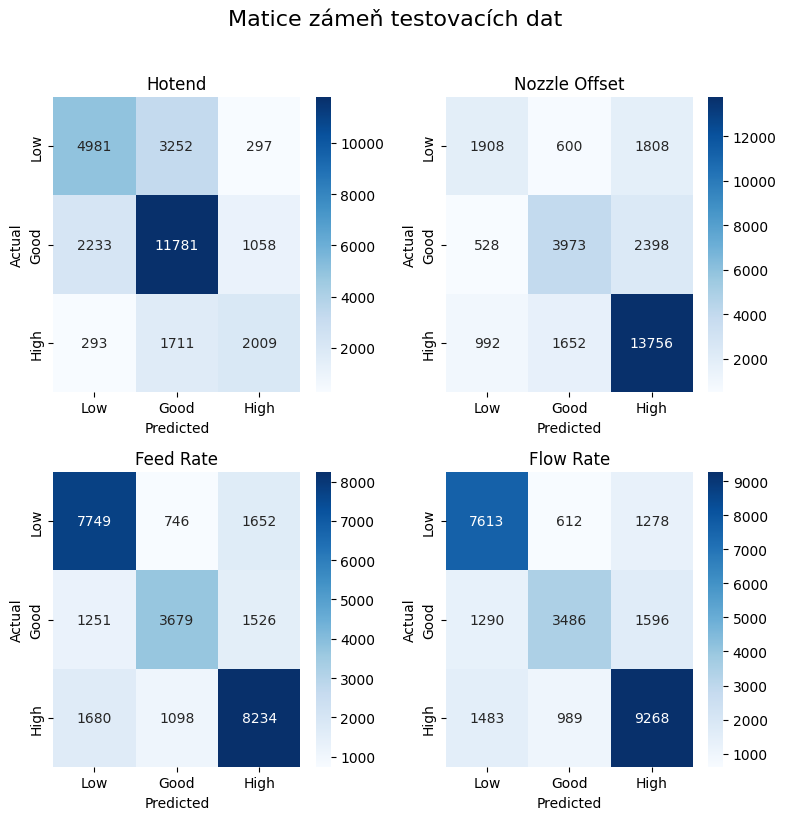

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the confusion matrices
confusion_matrices = {
    "Hotend": np.array([[4981, 3252, 297], [2233, 11781, 1058], [293, 1711, 2009]]),
    "Nozzle Offset": np.array([[1908, 600, 1808], [528, 3973, 2398], [992, 1652, 13756]]),
    "Feed Rate": np.array([[7749, 746, 1652], [1251, 3679, 1526], [1680, 1098, 8234]]),
    "Flow Rate": np.array([[7613, 612, 1278], [1290, 3486, 1596], [1483, 989, 9268]]),
}

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

# Plot each confusion matrix
for idx, (title, matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(
        matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Low", "Good", "High"],
        yticklabels=["Low", "Good", "High"],
        ax=axes[idx],
    )
    axes[idx].set_title(title)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Add a main title
fig.suptitle("Matice zámeň testovacích dat", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()



Pro lepší představu o tom, na které oblasti obrázku se naučil náš model soutředit přikládáme vizualizaci attention masky vytvořené během tréninku. Můžeme vidět, že ačkoli výsledky jsou relativně dobré, v tomto případě je maska lehce mimo. U evaluace dalších modelů uvidíme, že sice mají hoší předpovědi, ale attention maskou se dokázaly přesně trefit do regionů, na které se mají soustředit.

![Custom ResNet Attention Mask](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/CustomResNet_attention_mask.png)



2. **ArticleNet**

Tento model přinesl o něco horší výsledky než ResNet, ačkoli v článku, ze kterého jsme vycházeli ResNet překonal o celé čtyři procentní body. Věříme, že naše rekonstrukce tohoto modelu by přinesla stejné výsledky, kdybychom měli možnost trénovat model na plném datasetu, protože i výsledky získané tréninkem na opravdu malé podmnožině dat a z časových důvodů také na relatvině málo epochách vypdají že se model ubírá správným směrem.



Sledované metriky z tréninku, validace a testování:




## Trénovací metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5568       | 0.6113       | 0.5170       | 0.5363       |
| Precision             | 0.5369       | 0.5871       | 0.5489       | 0.4979       |
| Recall                | 0.3612       | 0.3625       | 0.4683       | 0.4717       |
| F1 Score              | 0.3060       | 0.3137       | 0.4459       | 0.4444       |

## Validační metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5559       | 0.6131       | 0.5358       | 0.5591       |
| Precision             | 0.5190       | 0.5533       | 0.5740       | 0.5130       |
| Recall                | 0.3799       | 0.3742       | 0.4803       | 0.4962       |
| F1 Score              | 0.3498       | 0.3397       | 0.4589       | 0.4706       |

## Testovací metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5573       | 0.6090       | 0.5420       | 0.5646       |
| Precision             | 0.5042       | 0.5572       | 0.6094       | 0.5239       |
| Recall                | 0.3732       | 0.3717       | 0.4858       | 0.5015       |
| F1 Score              | 0.3367       | 0.3337       | 0.4638       | 0.4789       |


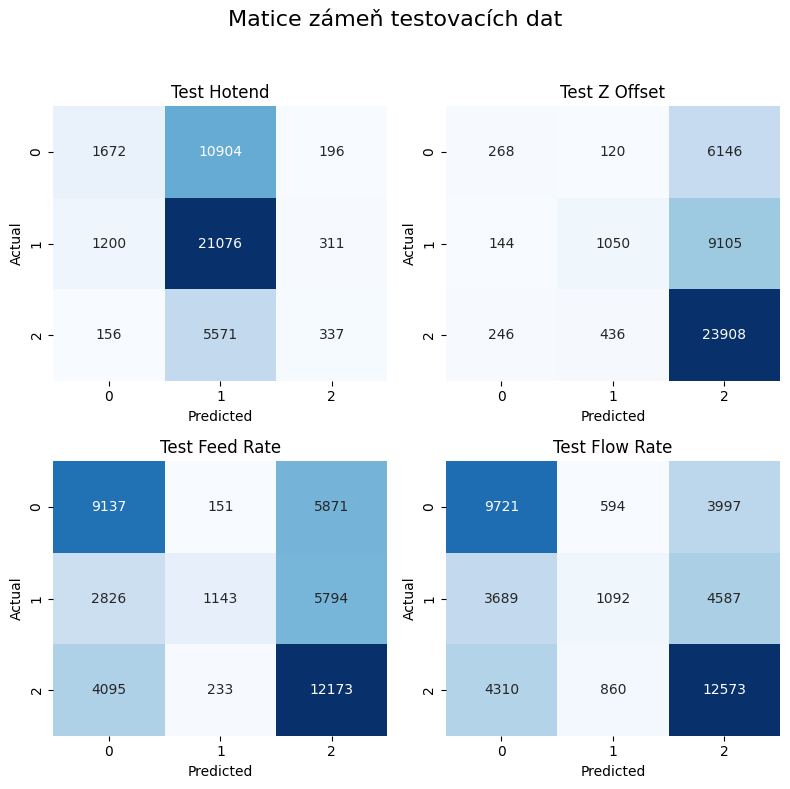

In [ ]:
test_confusion_matrices = {
    "Test Hotend": np.array([[1672, 10904, 196], [1200, 21076, 311], [156, 5571, 337]]),
    "Test Z Offset": np.array([[268, 120, 6146], [144, 1050, 9105], [246, 436, 23908]]),
    "Test Feed Rate": np.array([[9137, 151, 5871], [2826, 1143, 5794], [4095, 233, 12173]]),
    "Test Flow Rate": np.array([[9721, 594, 3997], [3689, 1092, 4587], [4310, 860, 12573]]),
}

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
fig.suptitle("Matice zámeň testovacích dat", fontsize=16)
axes = axes.flatten()

for i, (title, matrix) in enumerate(test_confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Abychom ukázali, že náš model správně identifikuje relevantní oblasti, jako je tisková hlavice a tiskové lůžko, přikládáme vizualizace masek z jednotlivých attention jednotek zdůrazňujících klíčové regiony.

Vizualizace masky první attention jednotky:

![Attention Mask](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/ArticleNet_attention1_mask_improved.png)


Vizualizace masky druhé attention jednotky:

![Attention Mask](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/ArticleNet2final_attention2_mask_improved.png)


Vizualizace masky třetí attention jednotky:

![Attention Mask](https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/ArticleNetfinal3_attention3_mask_improved.png)


3. **RosNet**

Tento model byl implementován jako poslední a z důvodu značné vytíženosti výpočeteního clusteru v závěru semestru se mu nedostalo takového tréninku, jaký by zaloužil. Prezentované výsledky jsou výsledky nasbírané pouze po pěti epochách tréninku na malém subsamplu datasetu (všechny modely byly trénované na stejném subsamplu, viz výše). Proto výsledky nejsou uspokojivé a náš vlastní model tedy dopadl z trojice implementovaných nejhůře. Přesto ale máme v naši architekturu důvěru a jsme přesvědčeni, že rozsáhleejším tréninkem bychom dosáhli výsledků výrazně lepších.



## Trénovací metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5279       | 0.5838       | 0.3798       | 0.3958       |
| Precision             | 0.2593       | 0.1946       | 0.2516       | 0.2518       |
| Recall                | 0.3334       | 0.3333       | 0.3364       | 0.3347       |
| F1 Score              | 0.2304       | 0.2457       | 0.2755       | 0.2186       |

## Validační metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5317       | 0.5863       | 0.3875       | 0.3984       |
| Precision             | 0.1772       | 0.1954       | 0.2624       | 0.1328       |
| Recall                | 0.3333       | 0.3333       | 0.3473       | 0.3333       |
| F1 Score              | 0.2314       | 0.2464       | 0.2852       | 0.1899       |

## Testovací metriky
| Metric                | Hotend       | Z Offset     | Feed Rate    | Flow Rate    |
|-----------------------|--------------|--------------|--------------|--------------|
| Accuracy              | 0.5291       | 0.5833       | 0.3857       | 0.3964       |
| Precision             | 0.1764       | 0.1944       | 0.2600       | 0.1321       |
| Recall                | 0.3333       | 0.3333       | 0.3454       | 0.3333       |
| F1 Score              | 0.2307       | 0.2456       | 0.2830       | 0.1892       |


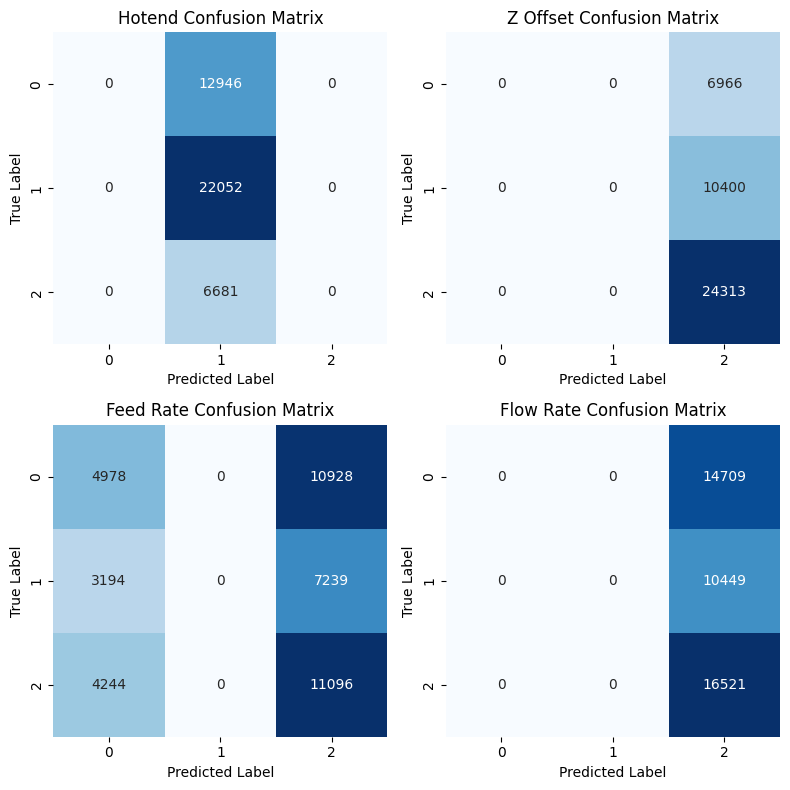

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_confusion_matrices = {
    "Hotend": np.array([[0, 12946, 0], [0, 22052, 0], [0, 6681, 0]]),
    "Z Offset": np.array([[0, 0, 6966], [0, 0, 10400], [0, 0, 24313]]),
    "Feed Rate": np.array([[4978, 0, 10928], [3194, 0, 7239], [4244, 0, 11096]]),
    "Flow Rate": np.array([[0, 0, 14709], [0, 0, 10449], [0, 0, 16521]]),
}


fig, axes = plt.subplots(2, 2, figsize=(8, 8))

for ax, (title, matrix) in zip(axes.flatten(), test_confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


# **Závěr**

V této semestrální práci jsme se zaměřili na detekci čtyř typů anomálií při 3D tisku, což je klíčový krok k zajištění kvality a efektivity této technologie. Pro tento účel jsme navrhli a otestovali tři modely, které jsou optimalizovány pro rychlé zpracování obrazových dat snímaných v intervalech 0,4 sekundy během tiskové epochy. Díky této rychlosti zpracování jsou naše modely vhodné pro detekci anomálií v reálném čase.

Navržené modely mohou hrát zásadní roli v průmyslové implementaci 3D tisku. Real-time analýza a schopnost modelů komunikovat s gcodem tiskárny umožňují okamžité zásahy, jako je úprava tiskových parametrů nebo předčasné ukončení vadného tisku. Tím se minimalizuje plýtvání drahým filamentem, energií a výrobní kapacitou tiskárny.

Výsledky této práce ukazují potenciál našich modelů pro zlepšení spolehlivosti 3D tisku a otevírají cestu k jeho širšímu nasazení v průmyslu. Další rozvoj tohoto přístupu by mohl zahrnovat integraci pokročilých algoritmů strojového učení, rozšíření na více typů anomálií nebo aplikaci na různé typy 3D tiskových technologií. To by mohlo představovat revoluční krok v průmyslové výrobě a posunout 3D tisk na novou úroveň spolehlivosti a efektivity.

Na závěr přikládáme video, které znázorňuje možnosti nasazení našich modelů do praxe.




In [ ]:
#this code runs a videa that visualises the potential use of out model
#to run it succesfully opencv-python moviepy and ffmpeg has be installed.
!pip install opencv-python moviepy
!wget https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/final_visualization.mov
!apt-get install ffmpeg
!ffmpeg -i final_visualization.mov -vcodec libx264 final_visualization_fixed.mp4


from moviepy.editor import VideoFileClip
from IPython.display import HTML

video = VideoFileClip('final_visualization_fixed.mp4')
!ffmpeg -i final_visualization.mov -c:v libx264 -pix_fmt yuv420p -crf 23 final_visualization_reencoded.mp4

HTML("""
<video width="640" height="480" controls>
  <source src="final_visualization_fixed.mp4" type="video/mp4">
</video>
""")





--2024-12-13 17:55:45--  https://raw.githubusercontent.com/Strojove-uceni/2024-final-hlina-rules/main/final_visualization.mov
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25724206 (25M) [application/octet-stream]
Saving to: ‘final_visualization.mov.6’

final_visualization 100%[===================>]  24.53M  46.6MB/s    in 0.5s    

2024-12-13 17:55:46 (46.6 MB/s) - ‘final_visualization.mov.6’ saved [25724206/25724206]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2

**Rozdělení práce v týmu:**

**Lydie Rosenkrancová**: návrh architektury, implementace, trénink a evaluace modelů, vizualizace výsledků, tvorba videa, tvorba závěrečného Colab protokolu

**Petr Večeř**: Tvorba prezentace, vizualizace architektury modelů, prezentování

### References
1. Brion, D.A.J., Pattinson, S.W. "Generalisable 3D printing error detection and correction via multi-head neural networks." *Nature Communications*, vol. 13, no. 4654, 2022. [DOI:10.1038/s41467-022-31985-y](https://doi.org/10.1038/s41467-022-31985-y)

2. Brion, D., & Pattinson, S. (2022). *Data set for "Generalisable 3D printing error detection and correction via multi-head neural networks"*. Apollo - University of Cambridge Repository. https://doi.org/10.17863/CAM.84082
